In [244]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from lightgbm.sklearn import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

%matplotlib inline


df = pd.read_csv('/Users/yangdongjae/Desktop/2020/대외활동/2020년 공공 빅데이터 청년 인턴십/실무형 프로젝트/roundabout_project/data/2017청주 교차로_prep.csv', encoding = 'cp949')

In [245]:
df.set_index(['교차로명'])

,통행량,좌회전 비율8,좌회전 비율13,좌회전 비율18,사고건수,교차로 반경 50m 내 무인교통단속카메라 수,교차로 반경 50m 내 신호등 수,교차로 반경 50m 내 신호등 유무
교차로명,,,,,,,,
흥덕4,12093,17.660000,18.260000,20.060000,8,0,0,0
현도면사무소3,6285,18.294190,13.341724,7.051565,3,2,0,0
효촌분기점3,8752,32.332633,25.972342,34.019955,0,0,0,0
터미널4,19712,7.365398,6.701429,6.856916,10,0,2,1
하이닉스반도체4,13278,18.630000,19.710000,18.360000,6,0,2,1
...,...,...,...,...,...,...,...,...
석판분기점4,4470,28.810000,25.590000,39.400000,1,0,0,0
서문교하상도로3,4499,19.332566,28.961039,30.989453,3,0,6,1
서청주교4,17604,30.930000,25.170000,23.480000,7,0,3,1


In [246]:
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df['통행량'].values.reshape(-1,1))
df.drop(columns = ['통행량'], inplace = True)


In [247]:
df.drop(columns = ['교차로명'],inplace = True)

In [248]:
df.head()

,좌회전 비율8,좌회전 비율13,좌회전 비율18,사고건수,교차로 반경 50m 내 무인교통단속카메라 수,교차로 반경 50m 내 신호등 수,교차로 반경 50m 내 신호등 유무
0,17.660000,18.260000,20.060000,8,0,0,0
1,18.294190,13.341724,7.051565,3,2,0,0
2,32.332633,25.972342,34.019955,0,0,0,0
3,7.365398,6.701429,6.856916,10,0,2,1
4,18.630000,19.710000,18.360000,6,0,2,1


In [225]:
df_scaler = pd.DataFrame(df_scaler)

In [226]:
df = pd.concat([df,df_scaler],axis = 1)

In [227]:
df.rename({"0":"y"},inplace = True)

In [228]:
df

,좌회전 비율8,좌회전 비율13,좌회전 비율18,사고건수,교차로 반경 50m 내 무인교통단속카메라 수,교차로 반경 50m 내 신호등 수,교차로 반경 50m 내 신호등 유무,0
0,17.660000,18.260000,20.060000,8,0,0,0,0.547485
1,18.294190,13.341724,7.051565,3,2,0,0,0.202530
2,32.332633,25.972342,34.019955,0,0,0,0,0.349053
3,7.365398,6.701429,6.856916,10,0,2,1,1.000000
4,18.630000,19.710000,18.360000,6,0,2,1,0.617865
...,...,...,...,...,...,...,...,...
65,28.810000,25.590000,39.400000,1,0,0,0,0.094732
66,19.332566,28.961039,30.989453,3,0,6,1,0.096454
67,30.930000,25.170000,23.480000,7,0,3,1,0.874800
68,16.054937,14.000596,19.555556,11,1,3,1,0.546713


In [229]:
df.rename(columns = {0:'y'},inplace = True)

In [230]:
df

,좌회전 비율8,좌회전 비율13,좌회전 비율18,사고건수,교차로 반경 50m 내 무인교통단속카메라 수,교차로 반경 50m 내 신호등 수,교차로 반경 50m 내 신호등 유무,y
0,17.660000,18.260000,20.060000,8,0,0,0,0.547485
1,18.294190,13.341724,7.051565,3,2,0,0,0.202530
2,32.332633,25.972342,34.019955,0,0,0,0,0.349053
3,7.365398,6.701429,6.856916,10,0,2,1,1.000000
4,18.630000,19.710000,18.360000,6,0,2,1,0.617865
...,...,...,...,...,...,...,...,...
65,28.810000,25.590000,39.400000,1,0,0,0,0.094732
66,19.332566,28.961039,30.989453,3,0,6,1,0.096454
67,30.930000,25.170000,23.480000,7,0,3,1,0.874800
68,16.054937,14.000596,19.555556,11,1,3,1,0.546713


In [231]:
df.columns

Index(['좌회전 비율8', '좌회전 비율13', '좌회전 비율18', '사고건수', '교차로 반경 50m 내 무인교통단속카메라 수',
       '교차로 반경 50m 내 신호등 수', '교차로 반경 50m 내 신호등 유무', 'y'],
      dtype='object')

In [232]:
x = df.drop(columns = ['y'])


In [233]:
y = df['y']

In [234]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [235]:
from sklearn.model_selection import KFold,cross_val_score
def rmse_cv(model):
    n_fold = 10
    kf = KFold(n_fold, shuffle=True,random_state=42).get_n_splits(train_x)
    rmse = np.sqrt(-cross_val_score(model,train_x.values,train_y,scoring='neg_mean_squared_error',cv=kf))
    return rmse

In [236]:
rf = RandomForestRegressor()

In [237]:
print("교차 검증 점수: {}".format(np.mean(rmse_cv(lgbm))))

print("교차 검증 점수: {}".format(np.mean(rmse_cv(rf))))

교차 검증 점수: 0.2351564803922034
교차 검증 점수: 0.26140859012541157


/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Use

In [238]:
from sklearn.metrics import mean_squared_error
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
mean_squared_error(y_test,pred)




/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0731816460307933

In [239]:
np.sqrt(mean_squared_error(y_test,pred))

0.27052106393180053

In [243]:
def set_font(font_file='malgun.ttf'): # 한글 출력
    font_dir = '/user/sanchez/Library/Fonts'
    font_name = fm.FontProperties(fname=os.path.join(font_dir, font_file)).get_name()
    rc('font', family=font_name)
set_font()

FileNotFoundError: [Errno 2] No such file or directory: '/user/sanchez/Library/Fonts/malgun.ttf'

In [242]:
df

,좌회전 비율8,좌회전 비율13,좌회전 비율18,사고건수,교차로 반경 50m 내 무인교통단속카메라 수,교차로 반경 50m 내 신호등 수,교차로 반경 50m 내 신호등 유무,y
0,17.660000,18.260000,20.060000,8,0,0,0,0.547485
1,18.294190,13.341724,7.051565,3,2,0,0,0.202530
2,32.332633,25.972342,34.019955,0,0,0,0,0.349053
3,7.365398,6.701429,6.856916,10,0,2,1,1.000000
4,18.630000,19.710000,18.360000,6,0,2,1,0.617865
...,...,...,...,...,...,...,...,...
65,28.810000,25.590000,39.400000,1,0,0,0,0.094732
66,19.332566,28.961039,30.989453,3,0,6,1,0.096454
67,30.930000,25.170000,23.480000,7,0,3,1,0.874800
68,16.054937,14.000596,19.555556,11,1,3,1,0.546713


/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yangdongjae/opt/anaconda3/li

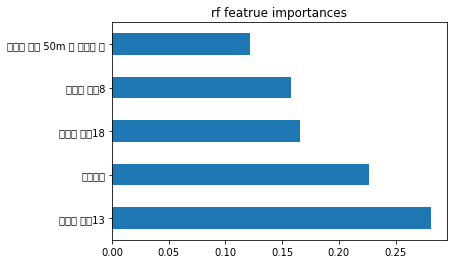

In [241]:
feat_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('rf featrue importances')
plt.show()